# Notebook 2: Trying with last periodicity of 1-7, 13,14,15, 20,21,22, 27,28,29

# Data

The data is downloaded from NATIONAL CENTRE FOR POLAR AND OCEAN RESEARCH, India: http://data.ncaor.gov.in/newhtml

# Dataset Info

In [1]:
with open('b_imdncpor_synoptic.txt') as f:
    print(' '.join(f.readlines()))


 ----------------------Synoptic Data-------------------------------------------------------------------
 
 Measurements/ data	: Synoptic
 Parameters		: Observation Time,  wind direction, wind speed, temparature, MSLP
 Duration		: 05-05-2016 to	02-08-2021
 Location		: Bharati
 Latitude and Longitude	: 69Â°24.41'S, 76Â°11.72'E
 Data file format	: ASCII
 
 ------------------------------------------------------------------------------------------------------
 
 
 



In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('synoptic_bharati.csv')
df.Time = pd.to_datetime(df.Time)
df.head()

,Time,WindDirection,WindSpeed,Temperature,Pressure
0,2016-05-01 00:00:00,5,8.0,-21.5,981.1
1,2016-05-22 00:00:00,0,0.0,-19.4,986.1
2,2016-05-22 06:00:00,9,10.0,-16.6,980.4
3,2016-05-22 12:00:00,9,9.0,-17.4,973.4
4,2016-05-22 18:00:00,5,13.0,-17.4,970.7


In [4]:
min_time = df.Time.min()
max_time = df.Time.max()
weather_data = pd.DataFrame(pd.date_range(min_time,max_time, freq='6H'), columns=['Time'])
weather_data.head()

,Time
0,2016-05-01 00:00:00
1,2016-05-01 06:00:00
2,2016-05-01 12:00:00
3,2016-05-01 18:00:00
4,2016-05-02 00:00:00


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html

In [5]:
weather_data = pd.merge(weather_data, df, on='Time', how='left')
weather_data.isna().sum()

Time                0
WindDirection    1906
WindSpeed        2013
Temperature      1922
Pressure         2268
dtype: int64

In [6]:
weather_data = weather_data.loc[2715:6000] # Through manual inspection and checking

Using Temperature data to forecast future temperature.

In [7]:
temp_df = weather_data[['Temperature']].copy()
temp_df.head()

,Temperature
2715,-14.6
2716,-17.2
2717,-14.0
2718,-15.5
2719,-16.8


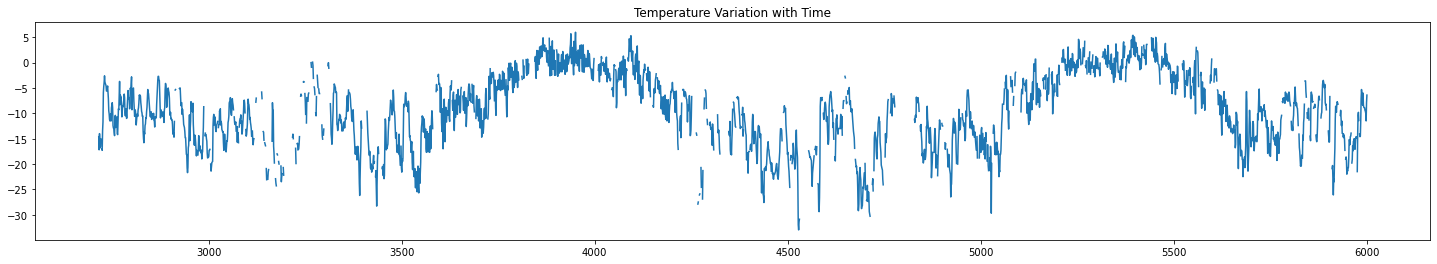

In [8]:
weather_data.Temperature.plot(figsize=(25,4), title='Temperature Variation with Time')
plt.show()

We can see highest temperature around january and lowet temperatures around July to October.

In [9]:
def simple_x_y_splitter(dataframe, col, prev_n_days=[]):
    df = dataframe.copy()
    for lag in prev_n_days:
        df[f'lag_{lag}'] = df[col].shift(lag)
    df.dropna(inplace=True)
    y = df[col].values
    X = df.drop([col], axis=1).values
    return np.expand_dims(X,2), y

In [11]:
X, y = simple_x_y_splitter(temp_df, 'Temperature',prev_n_days=[1,2,3,4,5,6,7,13,14,15,20,21,22,27,28,29])

In [14]:
y

array([-11. , -10.1, -11.5,  -8.9, -12.4, -12.9, -12.9, -13.8, -14.4,
       -10.8, -10.4, -12.8, -12.7, -11.5, -10.7, -14. , -14.2, -11.4,
        -9.1,  -9.3,  -6.3,  -3.7,  -8.3,  -6.4,  -6.9,  -6.8,  -8.8,
       -10.7,  -9.5,  -8.5,  -8.7,  -8. ,  -7.3,  -6.2,  -6.9,  -9.8,
       -10.5,  -9.1,  -9.5, -11. , -10.9,  -8.4,  -7.1,  -5.5,  -6.9,
        -7.2,  -7. ,  -9.1,  -8. ,  -5. ,  -5.8,  -4.1,  -2.8,  -9.3,
        -6.6,  -5.3,  -5.1,  -5. ,  -7.6,  -9.2, -10.6,  -9.3,  -9.5,
       -10.3, -12.3, -11.3, -10.5, -10.1, -10.6,  -9.3,  -8.9,  -7.9,
        -6.4,  -6.6,  -6.4,  -6.6,  -7.9,  -8.6,  -9.6,  -9.9, -10.6,
       -10.5, -13.5, -15. , -15.8, -13.7, -14.1, -12.4, -12.1, -10.9,
       -11. ,  -9.6,  -8.8,  -7.1,  -5.3,  -6. ,  -6.1,  -7.1,  -8.2,
        -9.3, -10.4, -10.7,  -9.9,  -9.7, -11.2, -11. , -10.1, -10.2,
       -11. , -10. , -11.4, -11.5, -12.7, -10.7, -10.8, -10.8, -10.9,
        -8.3,  -6.6,  -4.9,  -3.4,  -2.7,  -2.7,  -3.4,  -3.5,  -6.4,
        -8.7, -10.9,

In [15]:
X

array([[[-11.5],
        [-11.2],
        [-10.1],
        ...,
        [-15.5],
        [-14. ],
        [-17.2]],

       [[-11. ],
        [-11.5],
        [-11.2],
        ...,
        [-16.8],
        [-15.5],
        [-14. ]],

       [[-10.1],
        [-11. ],
        [-11.5],
        ...,
        [-16.5],
        [-16.8],
        [-15.5]],

       ...,

       [[ -9.6],
        [ -9.4],
        [ -8.9],
        ...,
        [-16.1],
        [-17.1],
        [-15.8]],

       [[-10. ],
        [ -9.6],
        [ -9.4],
        ...,
        [-14.9],
        [-16.1],
        [-17.1]],

       [[-11.5],
        [-10. ],
        [ -9.6],
        ...,
        [-14.6],
        [-14.9],
        [-16.1]]])

# Temporal splitting

In [16]:
train_val_split_idx, val_test_split_idx = int(X.shape[0]*.7), int(X.shape[0]*.85)
print(train_val_split_idx, val_test_split_idx)
X_train, y_train = X[:train_val_split_idx], y[:train_val_split_idx]
X_val, y_val = X[train_val_split_idx:val_test_split_idx], y[train_val_split_idx:val_test_split_idx]
X_test, y_test = X[val_test_split_idx:], y[val_test_split_idx:]

625 759


# Standardization

In [17]:
X_train_mean = X_train.mean()
X_train_sd= X_train.std()
y_train_mean = y_train.mean()
y_train_sd= y_train.std()

def standardize(x, y):
    x_std = (x-X_train_mean)/X_train_sd
    y_std = (y-y_train_mean)/y_train_sd
    return x_std, y_std

X_train_std, y_train_std = standardize(X_train, y_train)
X_val_std, y_val_std = standardize(X_val, y_val)
X_test_std, y_test_std = standardize(X_test, y_test)

# LSTM Model 1

In [18]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

In [22]:
from tensorflow.keras.callbacks import TensorBoard

tb1 = TensorBoard(
    log_dir='logs4',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None
)

In [26]:
len([1,2,3,4,5,6,7,13,14,15,20,21,22,27,28,29])

16

In [27]:
model1 = Sequential()
model1.add(InputLayer((16,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp1 = ModelCheckpoint('model4/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [29]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp1, tb1])

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 102.9813 - root_mean_squared_error: 10.1480

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 30s 1s/step - loss: 102.9813 - root_mean_squared_error: 10.1480 - val_loss: 59.8081 - val_root_mean_squared_error: 7.7336
Epoch 2/50
16/20 [=======================>......] - ETA: 0s - loss: 51.8771 - root_mean_squared_error: 7.2026

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 657ms/step - loss: 52.3679 - root_mean_squared_error: 7.2366 - val_loss: 39.2687 - val_root_mean_squared_error: 6.2665
Epoch 3/50
18/20 [==========================>...] - ETA: 0s - loss: 29.7444 - root_mean_squared_error: 5.4538

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 16s 863ms/step - loss: 28.5540 - root_mean_squared_error: 5.3436 - val_loss: 23.2822 - val_root_mean_squared_error: 4.8252
Epoch 4/50
17/20 [========================>.....] - ETA: 0s - loss: 20.3352 - root_mean_squared_error: 4.5095

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 16s 830ms/step - loss: 19.6127 - root_mean_squared_error: 4.4286 - val_loss: 18.4147 - val_root_mean_squared_error: 4.2912
Epoch 5/50
16/20 [=======================>......] - ETA: 0s - loss: 16.0752 - root_mean_squared_error: 4.0094

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 651ms/step - loss: 15.5401 - root_mean_squared_error: 3.9421 - val_loss: 14.9305 - val_root_mean_squared_error: 3.8640
Epoch 6/50
16/20 [=======================>......] - ETA: 0s - loss: 12.8393 - root_mean_squared_error: 3.5832

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 13s 666ms/step - loss: 12.9679 - root_mean_squared_error: 3.6011 - val_loss: 13.3422 - val_root_mean_squared_error: 3.6527
Epoch 7/50
16/20 [=======================>......] - ETA: 0s - loss: 12.0819 - root_mean_squared_error: 3.4759

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 635ms/step - loss: 11.1678 - root_mean_squared_error: 3.3418 - val_loss: 11.9720 - val_root_mean_squared_error: 3.4601
Epoch 8/50
17/20 [========================>.....] - ETA: 0s - loss: 9.4764 - root_mean_squared_error: 3.0784

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 640ms/step - loss: 9.3973 - root_mean_squared_error: 3.0655 - val_loss: 11.4947 - val_root_mean_squared_error: 3.3904
Epoch 9/50
16/20 [=======================>......] - ETA: 0s - loss: 8.4538 - root_mean_squared_error: 2.9075

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 11s 569ms/step - loss: 8.2494 - root_mean_squared_error: 2.8722 - val_loss: 9.6534 - val_root_mean_squared_error: 3.1070
Epoch 10/50
20/20 [==============================] - 0s 15ms/step - loss: 7.3987 - root_mean_squared_error: 2.7200 - val_loss: 9.8443 - val_root_mean_squared_error: 3.1376
Epoch 11/50
18/20 [==========================>...] - ETA: 0s - loss: 6.8943 - root_mean_squared_error: 2.6257

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 13s 666ms/step - loss: 6.7248 - root_mean_squared_error: 2.5932 - val_loss: 8.8035 - val_root_mean_squared_error: 2.9671
Epoch 12/50
18/20 [==========================>...] - ETA: 0s - loss: 5.9685 - root_mean_squared_error: 2.4431

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 14s 738ms/step - loss: 6.0427 - root_mean_squared_error: 2.4582 - val_loss: 8.6524 - val_root_mean_squared_error: 2.9415
Epoch 13/50
16/20 [=======================>......] - ETA: 0s - loss: 6.4172 - root_mean_squared_error: 2.5332

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 21s 1s/step - loss: 6.1108 - root_mean_squared_error: 2.4720 - val_loss: 7.8351 - val_root_mean_squared_error: 2.7991
Epoch 14/50
20/20 [==============================] - 2s 96ms/step - loss: 5.9299 - root_mean_squared_error: 2.4351 - val_loss: 8.6287 - val_root_mean_squared_error: 2.9375
Epoch 15/50
20/20 [==============================] - ETA: 0s - loss: 5.5579 - root_mean_squared_error: 2.3575

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 16s 821ms/step - loss: 5.5579 - root_mean_squared_error: 2.3575 - val_loss: 7.7554 - val_root_mean_squared_error: 2.7849
Epoch 16/50
20/20 [==============================] - ETA: 0s - loss: 5.0698 - root_mean_squared_error: 2.2516

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 14s 721ms/step - loss: 5.0698 - root_mean_squared_error: 2.2516 - val_loss: 7.3734 - val_root_mean_squared_error: 2.7154
Epoch 17/50
20/20 [==============================] - ETA: 0s - loss: 4.8562 - root_mean_squared_error: 2.2037

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 48s 3s/step - loss: 4.8562 - root_mean_squared_error: 2.2037 - val_loss: 7.1825 - val_root_mean_squared_error: 2.6800
Epoch 18/50
18/20 [==========================>...] - ETA: 0s - loss: 4.6756 - root_mean_squared_error: 2.1623

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 20s 1s/step - loss: 4.6280 - root_mean_squared_error: 2.1513 - val_loss: 6.8995 - val_root_mean_squared_error: 2.6267
Epoch 19/50
19/20 [===========================>..] - ETA: 0s - loss: 4.8988 - root_mean_squared_error: 2.2133

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 16s 849ms/step - loss: 5.0177 - root_mean_squared_error: 2.2400 - val_loss: 6.7643 - val_root_mean_squared_error: 2.6008
Epoch 20/50
17/20 [========================>.....] - ETA: 0s - loss: 5.0811 - root_mean_squared_error: 2.2541

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 15s 771ms/step - loss: 5.0179 - root_mean_squared_error: 2.2401 - val_loss: 6.5604 - val_root_mean_squared_error: 2.5613
Epoch 21/50
18/20 [==========================>...] - ETA: 0s - loss: 4.5049 - root_mean_squared_error: 2.1225

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 615ms/step - loss: 4.3838 - root_mean_squared_error: 2.0938 - val_loss: 6.5095 - val_root_mean_squared_error: 2.5514
Epoch 22/50
20/20 [==============================] - 0s 17ms/step - loss: 4.5502 - root_mean_squared_error: 2.1331 - val_loss: 6.6464 - val_root_mean_squared_error: 2.5781
Epoch 23/50
18/20 [==========================>...] - ETA: 0s - loss: 4.2863 - root_mean_squared_error: 2.0703

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 652ms/step - loss: 4.2503 - root_mean_squared_error: 2.0616 - val_loss: 5.9830 - val_root_mean_squared_error: 2.4460
Epoch 24/50
20/20 [==============================] - 0s 15ms/step - loss: 4.3741 - root_mean_squared_error: 2.0914 - val_loss: 6.4928 - val_root_mean_squared_error: 2.5481
Epoch 25/50
20/20 [==============================] - 0s 15ms/step - loss: 4.3833 - root_mean_squared_error: 2.0936 - val_loss: 6.3534 - val_root_mean_squared_error: 2.5206
Epoch 26/50
20/20 [==============================] - 0s 16ms/step - loss: 4.1851 - root_mean_squared_error: 2.0457 - val_loss: 6.4411 - val_root_mean_squared_error: 2.5379
Epoch 27/50
20/20 [==============================] - 0s 24ms/step - loss: 4.1957 - root_mean_squared_error: 2.0483 - val_loss: 6.4780 - val_root_mean_squared_error: 2.5452
Epoch 28/50
20/20 [==============================] - 0s 16ms/step - loss: 4.2205 - root_mean_squared_error: 2.0544 - val_loss: 6.4194 - val_root_mean_

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 11s 596ms/step - loss: 4.0462 - root_mean_squared_error: 2.0115 - val_loss: 5.6818 - val_root_mean_squared_error: 2.3836
Epoch 33/50
20/20 [==============================] - 0s 15ms/step - loss: 3.8428 - root_mean_squared_error: 1.9603 - val_loss: 5.9983 - val_root_mean_squared_error: 2.4491
Epoch 34/50
20/20 [==============================] - 0s 20ms/step - loss: 3.9257 - root_mean_squared_error: 1.9813 - val_loss: 5.9051 - val_root_mean_squared_error: 2.4300
Epoch 35/50
20/20 [==============================] - 0s 23ms/step - loss: 4.2766 - root_mean_squared_error: 2.0680 - val_loss: 5.7727 - val_root_mean_squared_error: 2.4026
Epoch 36/50
20/20 [==============================] - 0s 16ms/step - loss: 3.8319 - root_mean_squared_error: 1.9575 - val_loss: 5.7050 - val_root_mean_squared_error: 2.3885
Epoch 37/50
20/20 [==============================] - ETA: 0s - loss: 3.9045 - root_mean_squared_error: 1.9760

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 611ms/step - loss: 3.9045 - root_mean_squared_error: 1.9760 - val_loss: 5.6172 - val_root_mean_squared_error: 2.3701
Epoch 38/50
20/20 [==============================] - 0s 15ms/step - loss: 3.8492 - root_mean_squared_error: 1.9620 - val_loss: 5.7993 - val_root_mean_squared_error: 2.4082
Epoch 39/50
20/20 [==============================] - 0s 15ms/step - loss: 3.7616 - root_mean_squared_error: 1.9395 - val_loss: 5.6398 - val_root_mean_squared_error: 2.3748
Epoch 40/50
20/20 [==============================] - 0s 15ms/step - loss: 3.7504 - root_mean_squared_error: 1.9366 - val_loss: 5.9842 - val_root_mean_squared_error: 2.4463
Epoch 41/50
20/20 [==============================] - 0s 24ms/step - loss: 3.7621 - root_mean_squared_error: 1.9396 - val_loss: 5.6211 - val_root_mean_squared_error: 2.3709
Epoch 42/50
20/20 [==============================] - 0s 15ms/step - loss: 3.8054 - root_mean_squared_error: 1.9507 - val_loss: 5.7535 - val_root_mean_

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 12s 631ms/step - loss: 4.0211 - root_mean_squared_error: 2.0053 - val_loss: 5.5705 - val_root_mean_squared_error: 2.3602
Epoch 45/50
18/20 [==========================>...] - ETA: 0s - loss: 3.6123 - root_mean_squared_error: 1.9006

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 13s 680ms/step - loss: 3.6609 - root_mean_squared_error: 1.9133 - val_loss: 5.4137 - val_root_mean_squared_error: 2.3267
Epoch 46/50
18/20 [==========================>...] - ETA: 0s - loss: 3.9848 - root_mean_squared_error: 1.9962

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 16s 828ms/step - loss: 3.9314 - root_mean_squared_error: 1.9828 - val_loss: 5.3994 - val_root_mean_squared_error: 2.3237
Epoch 47/50
20/20 [==============================] - 1s 30ms/step - loss: 3.8518 - root_mean_squared_error: 1.9626 - val_loss: 5.6709 - val_root_mean_squared_error: 2.3814
Epoch 48/50
20/20 [==============================] - ETA: 0s - loss: 3.8463 - root_mean_squared_error: 1.9612

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


20/20 [==============================] - 18s 962ms/step - loss: 3.8463 - root_mean_squared_error: 1.9612 - val_loss: 5.2989 - val_root_mean_squared_error: 2.3019
Epoch 49/50
20/20 [==============================] - 1s 45ms/step - loss: 3.6691 - root_mean_squared_error: 1.9155 - val_loss: 6.0434 - val_root_mean_squared_error: 2.4583
Epoch 50/50
20/20 [==============================] - 0s 17ms/step - loss: 3.9227 - root_mean_squared_error: 1.9806 - val_loss: 5.3910 - val_root_mean_squared_error: 2.3219


In [30]:
def post_process(y):
    return (X_train_sd*y)+X_train_mean

In [31]:
from tensorflow.keras.models import load_model
model1 = load_model('model4/')

In [32]:
predicted_test_df = pd.DataFrame({'Predicted Temperature':post_process(model1.predict(X_test_std).flatten()), 'Actual Temperature': y_test})
predicted_val_df = pd.DataFrame({'Predicted Temperature':post_process(model1.predict(X_val_std).flatten()), 'Actual Temperature': y_val})
predicted_train_df = pd.DataFrame({'Predicted Temperature':post_process(model1.predict(X_train_std).flatten()), 'Actual Temperature': y_train})

20/20 [==============================] - 0s 13ms/step


In [33]:
from sklearn.metrics import mean_squared_error

<AxesSubplot:title={'center':'RMSE: 4.442627213446369'}>

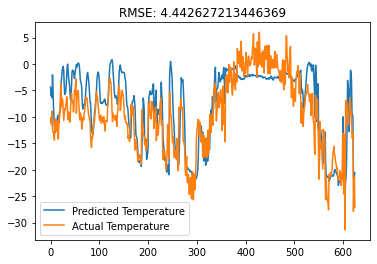

In [34]:
predicted_train_df.plot(title=f"RMSE: {mean_squared_error(predicted_train_df['Actual Temperature'], predicted_train_df['Predicted Temperature'], squared=False)}")

<AxesSubplot:title={'center':'RMSE:4.049101051383514'}>

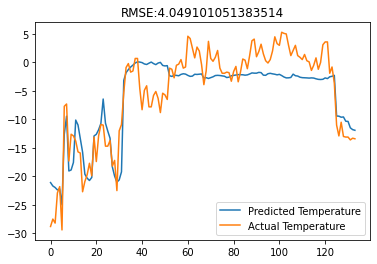

In [35]:
predicted_val_df.plot(title = f"RMSE:{mean_squared_error(predicted_val_df['Actual Temperature'], predicted_val_df['Predicted Temperature'], squared=False)}")

<AxesSubplot:title={'center':'RMSE:4.489537844110755'}>

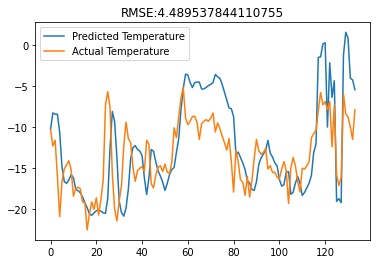

In [36]:
predicted_test_df.plot(title = f"RMSE:{mean_squared_error(predicted_test_df['Actual Temperature'], predicted_test_df['Predicted Temperature'], squared=False)}")


In [37]:
y.shape

(893,)

RMSE got way worse when trying with last values of 1-7, 13,14,15, 20,21,22, 27,28,29

Trying with small values with input size 7x1